In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [50]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [51]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [26]:
df = pd.read_csv('fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.shape

(10000, 785)

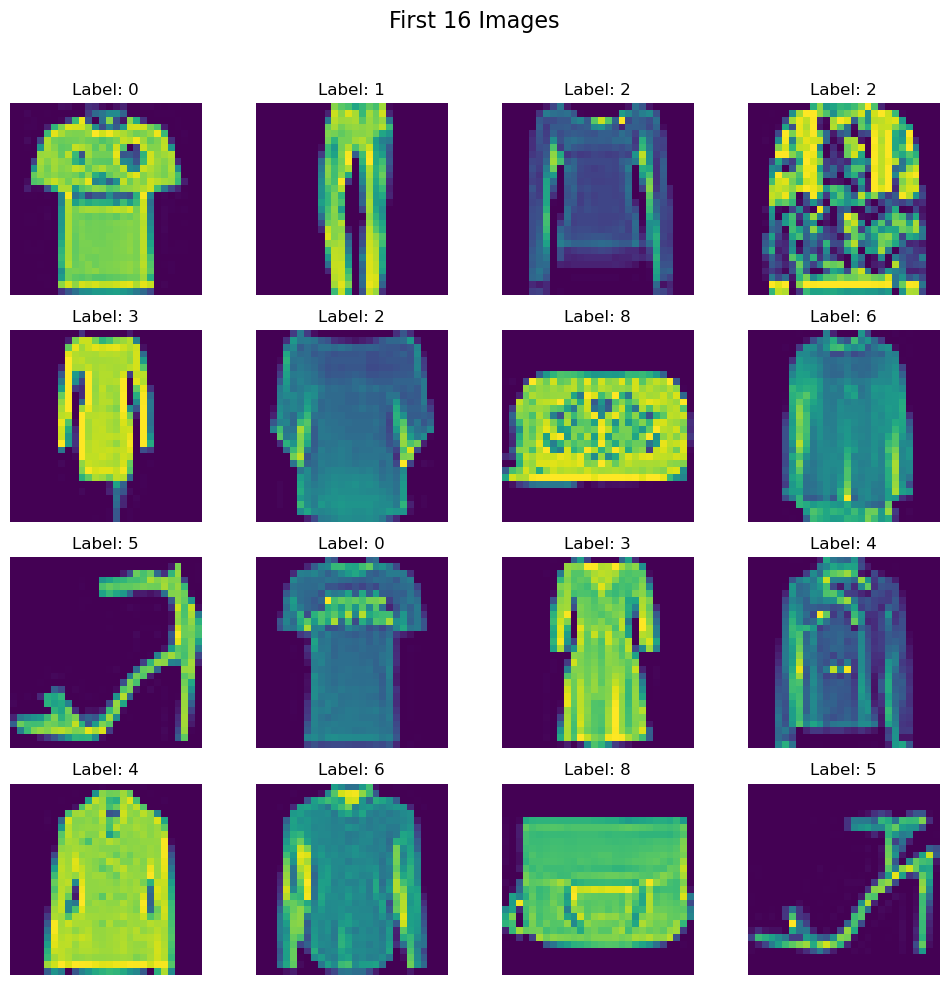

In [28]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [29]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train = X_train/255.0
X_test = X_test/255.0

In [32]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [33]:
train_dataset = CustomDataset(X_train, y_train)

In [34]:
test_dataset = CustomDataset(X_test, y_test)

In [35]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [36]:
len(train_loader)

250

In [37]:
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)

    )

  def forward(self, x):

    return self.model(x)


In [38]:
learning_rate = 0.1
epochs = 100

In [39]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [40]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


C:\Users\ritik\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch: 1 , Loss: 1.1000939716100693
Epoch: 2 , Loss: 0.6562159595489502
Epoch: 3 , Loss: 0.5459831331372261
Epoch: 4 , Loss: 0.49038056963682175
Epoch: 5 , Loss: 0.45422116059064865
Epoch: 6 , Loss: 0.42985714015364646
Epoch: 7 , Loss: 0.4074053062200546
Epoch: 8 , Loss: 0.38366756185889245
Epoch: 9 , Loss: 0.3644450223147869
Epoch: 10 , Loss: 0.35923640233278276
Epoch: 11 , Loss: 0.3354197042733431
Epoch: 12 , Loss: 0.3246269653439522
Epoch: 13 , Loss: 0.30667670945823194
Epoch: 14 , Loss: 0.30469723227620127
Epoch: 15 , Loss: 0.29086729598045347
Epoch: 16 , Loss: 0.28097976598143576
Epoch: 17 , Loss: 0.27186631122231486
Epoch: 18 , Loss: 0.26244241830706594
Epoch: 19 , Loss: 0.25688289672136305
Epoch: 20 , Loss: 0.25109578360617163
Epoch: 21 , Loss: 0.23829599457979203
Epoch: 22 , Loss: 0.23036945846676826
Epoch: 23 , Loss: 0.21938094201683997
Epoch: 24 , Loss: 0.21881818756461144
Epoch: 25 , Loss: 0.20905663442611694
Epoch: 26 , Loss: 0.1978832458406687
Epoch: 27 , Loss: 0.201195835

In [47]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [48]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.859


In [45]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.999


In [49]:
# since the training accuracy is larger than testing one it will overfits and can be reduced by 
# adding more data 
# reducing the complexity of NN architecture 
# regularization
# dropouts 
# data augmentation
# batch normalization
# Early stopping
# see days 8 of pytorch jupyter notebook


In [52]:
# since i want to learn from this notebook i had written it on jupyter the complete code in gpu is written on colab notebbook too
